<div class="alert alert-block alert-info">
<span style="color: rgb(0,53,91);">
<center><img src="https://imgs.search.brave.com/vIujYFx1qV5CoxJb72HNVYIoBXQjuasIvdngB1DPC3s/rs:fit:860:0:0:0/g:ce/aHR0cHM6Ly91cGxv/YWQud2lraW1lZGlh/Lm9yZy93aWtpcGVk/aWEvZW4vdGh1bWIv/NS81Zi9XZXN0ZXJu/X0luc3RpdHV0ZV9v/Zl9UZWNobm9sb2d5/X2FuZF9IaWdoZXJf/RWR1Y2F0aW9uX2xv/Z28ucG5nLzIwMHB4/LVdlc3Rlcm5fSW5z/dGl0dXRlX29mX1Rl/Y2hub2xvZ3lfYW5k/X0hpZ2hlcl9FZHVj/YXRpb25fbG9nby5w/bmc" style="width:180px;height:142px;" title="Logo ITESO"></center>
<font face = "Times New Roman" size = "6"><b><center>Programacion para Mineria de Datos</center></b></font>
<font face = "Times New Roman" size = "5"><b><center>TAREA: Fuga de Datos</center></b></font>

<b><font back = "Times New Roman" size = "4"><center>Unidad 4: </center></font>
<font face = "Times New Roman" size = "4"><center>Tema 4.3: Integración de Datos: Categóricos, Numéricos, Faltantes y Fuga de Datos</center></font>

<b><font back = "Times New Roman" size = "4"><center>Equipo: </center></font>
<font face = "Times New Roman" size = "4"><center> Diego Lemus, Sebastian Zinchenko, Jesus Vargas </center></font>

<div align="right"><font face = "Times New Roman" size = "2">Mtro. Miguel Tlapa Juarez (migueltlapa@iteso.mx)</font></div>
</span></div>

# Importamos Librerias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# Cargar CSV

In [2]:
df = pd.read_csv("data/datos_preprocessing_integration_tarea.csv")
df.columns

Index(['edad', 'ingreso_mensual', 'talla_cm', 'peso_kg', 'temperatura_c',
       'frecuencia_cardiaca', 'ciudad', 'tipo_servicio', 'nivel',
       'codigo_serie', 'referencia', 'sensor_defectuoso'],
      dtype='object')

In [3]:
df.shape

(500, 12)

In [4]:
df.head(10)

,edad,ingreso_mensual,talla_cm,peso_kg,temperatura_c,frecuencia_cardiaca,ciudad,tipo_servicio,nivel,codigo_serie,referencia,sensor_defectuoso
0,39.0,NaN,174.287097,78.317375,NaN,76.552698,Puebla,basico,alto,Z,REF-964053,NaN
1,NaN,16048.0,168.917333,73.530586,36.332796,NaN,Puebla,estandar,medio,Y,REF-147729,NaN
2,44.0,41790.0,161.139089,94.093905,36.117298,96.188603,NaN,basico,alto,X,REF-867825,NaN
3,NaN,13803.0,160.267146,71.686776,36.251983,89.602824,Puebla,estandar,bajo,NaN,REF-406327,NaN
4,15.0,NaN,NaN,50.069666,NaN,64.701549,Guadalajara,estandar,alto,X,REF-159441,NaN
5,19.0,19478.0,172.883350,63.754639,36.774273,78.416138,CDMX,basico,medio,Y,NaN,NaN
6,NaN,21017.0,159.399373,82.716684,36.635790,81.274194,NaN,basico,medio,Y,REF-254548,NaN
7,31.0,NaN,171.937610,80.537127,36.206965,54.284596,NaN,estandar,alto,Z,REF-258264,NaN
8,NaN,14488.0,156.824200,53.061185,36.868404,NaN,CDMX,basico,medio,NaN,REF-981686,NaN
9,NaN,NaN,166.163383,64.859205,36.171353,103.275902,Puebla,basico,bajo,Y,REF-298834,NaN


# Descripcion dedatos Numericos

In [5]:
df.describe()

,edad,ingreso_mensual,talla_cm,peso_kg,temperatura_c,frecuencia_cardiaca,sensor_defectuoso
count,381.000000,405.000000,446.000000,434.000000,421.000000,378.000000,43.000000
mean,36.223097,21882.474860,167.991549,73.189043,36.682513,76.630167,-0.032688
std,15.056738,15714.795822,9.484114,13.525559,0.571884,12.114607,0.944514
min,15.000000,2016.000000,141.399431,40.000000,35.527677,41.661780,-3.110488
25%,27.000000,11741.000000,161.851488,64.283555,36.389489,67.873656,-0.446572
50%,34.000000,18065.000000,168.245734,73.738661,36.643309,76.025219,-0.017434
75%,42.000000,26300.000000,174.273273,82.493571,36.876278,85.000631,0.680576
max,109.000000,121229.000000,193.282898,115.799425,40.304299,112.714375,1.283845


# Descripcion de Datos Categoricos

In [6]:
df.describe(include='object')

,ciudad,tipo_servicio,nivel,codigo_serie,referencia
count,410,399,405,430,488
unique,5,3,3,3,488
top,CDMX,basico,medio,Z,REF-964053
freq,145,194,139,163,1


# Separacion de tabla Traning y Test

In [7]:
X_train, X_test = train_test_split(df, test_size=0.25, random_state=0)

In [8]:
X_train.describe()

,edad,ingreso_mensual,talla_cm,peso_kg,temperatura_c,frecuencia_cardiaca,sensor_defectuoso
count,288.000000,304.000000,339.000000,329.000000,316.000000,277.000000,35.000000
mean,36.673611,22433.165521,167.730403,73.082786,36.673234,77.279166,-0.080244
std,15.618416,16605.173891,9.707425,14.057501,0.512804,12.269605,1.018295
min,15.000000,2016.000000,141.399431,40.000000,35.633064,41.661780,-3.110488
25%,28.000000,12193.250000,161.533733,63.940191,36.418454,68.041915,-0.889859
50%,36.000000,18328.000000,167.600075,73.328873,36.657386,76.494160,-0.048844
75%,42.000000,26335.750000,174.283724,82.726023,36.872642,86.024524,0.914006
max,109.000000,121229.000000,193.282898,115.799425,40.304299,112.714375,1.283845


In [9]:
X_train.to_csv("data/X_train.csv")

# Deteccion de Outliers (unicamente parte de entrenamiento)

In [10]:
# Agarramos columnas numericas
num_cols = X_train.select_dtypes(include='number').columns.tolist()
print(num_cols)

# Detectamos outliers

def iqr_outliers(s: pd.Series):
    #convertimos la serie a una serie numerica y eliminamos los vacios
    s = pd.to_numeric(s, errors='coerce').dropna()
    if s.empty:
        return 0, 0.0, np.nan, np.nan, np.nan, np.nan

    #Calculamos el rango intercuartilar
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1

    #calculo de limites
    lim_inf, lim_sup = q1 - 1.5 * q1, q3 + 1.5 * q3


    outlier_detected = int((s<lim_inf | s>lim_sup).sum())
    proportion_outliers_respect_total = outlier_detected/len(s)

    return outlier_detected, proportion_outliers_respect_total, lim_inf, lim_sup, q1, q3

['edad', 'ingreso_mensual', 'talla_cm', 'peso_kg', 'temperatura_c', 'frecuencia_cardiaca', 'sensor_defectuoso']


# Diagnóstico Numérico Completo con Heurística

In [19]:
# Función para realizar diagnóstico numérico completo
def diagnostico_numerico_completo(df, columnas_numericas):
    resultados = [] # Lista para almacenar resultados
    
    for col in columnas_numericas:  
        # Convertir a numérico y obtener estadísticas
        s = pd.to_numeric(df[col], errors='coerce')
        
        # Estadísticas básicas
        total = len(s) # Total de registros
        faltantes = s.isna().sum()  # Faltantes
        presentes = total - faltantes   # Presentes
        pct_faltantes = (faltantes / total) * 100 if total > 0 else 0   # Si hay datos faltantes
        
        # Si no hay datos válidos, registrar y continuar
        if presentes == 0:
            resultados.append({
                'Columna': col, # Nombre de la columna
                'Total': total, # Total de registros
                'Faltantes': faltantes,     # Faltantes
                '% Faltantes': f"{pct_faltantes:.2f}%", # % Faltantes
                'Presentes': 0, # Presentes
                'Min': np.nan, # Min
                'Max': np.nan, # Max
                'Media': np.nan,    # Media
                'Mediana': np.nan, # Mediana
                'Desv. Est.': np.nan,   # Desviación Estándar
                'Q1': np.nan,   # Primer Cuartil
                'Q3': np.nan,   # Tercer Cuartil
                'IQR': np.nan,  # Rango Intercuartílico
                'Límite Inf': np.nan,   # Límite Inferior
                'Límite Sup': np.nan,   # Límite Superior
                'Outliers': 0,  # Outliers
                '% Outliers': '0.00%',  # % Outliers
                'Rango Detectado': 'Sin datos', # Rango Detectado
                'Escala Sugerida': 'N/A'    # Escala Sugerida
            })
            continue    # Continuar con la siguiente columna
        
        # Eliminar NaN para cálculos
        s_clean = s.dropna()
        
        # Estadísticas descriptivas
        min_val = float(s_clean.min())  # Mínimo
        max_val = float(s_clean.max())  # Máximo
        media = float(s_clean.mean())   # Media
        mediana = float(s_clean.median())   # Mediana
        desv_est = float(s_clean.std()) # Desviación Estándar
        
        # Cuartiles y detección de outliers (IQR)
        q1 = float(s_clean.quantile(0.25))  # Primer Cuartil
        q3 = float(s_clean.quantile(0.75))  # Tercer Cuartil
        iqr = q3 - q1
        
        # Límites para outliers
        lim_inf = q1 - 1.5 * iqr    # Límite Inferior
        lim_sup = q3 + 1.5 * iqr    # Límite Superior
        
        # Contar outliers
        outliers_mask = (s_clean < lim_inf) | (s_clean > lim_sup)   # Máscara de outliers
        num_outliers = int(outliers_mask.sum()) # Número de outliers
        pct_outliers = (num_outliers / presentes) * 100 if presentes > 0 else 0 # % Outliers
        
        # HEURÍSTICA: Detectar rango de datos
        rango_detectado = "Personalizado"
        escala_sugerida = "RobustScaler"
        
        # Detectar si es porcentaje [0, 100]
        if min_val >= 0 and max_val <= 100: # Si está entre 0 y 100
            rango_detectado = "[0, 100] - Posible porcentaje"   # Si es porcentaje
            escala_sugerida = "MinMaxScaler"    # Usar MinMaxScaler
        
        # Detectar si es probabilidad [0, 1]
        elif min_val >= 0 and max_val <= 1: # Si está entre 0 y 1
            rango_detectado = "[0, 1] - Posible probabilidad"   # Si es probabilidad
            escala_sugerida = "MinMaxScaler"    # Usar MinMaxScaler
        
        # Detectar si es positivo con outliers
        elif min_val >= 0 and pct_outliers > 5: # Si es positivo y tiene más del 5% de outliers
            rango_detectado = "[0, ∞) - Valores positivos con outliers" # Si es positivo con outliers
            escala_sugerida = "RobustScaler o Log Transform"    # Usar RobustScaler o Log Transform
        
        # Detectar si es positivo sin outliers
        elif min_val >= 0:  # Si es positivo
            rango_detectado = "[0, ∞) - Valores positivos" # Si es positivo
            escala_sugerida = "StandardScaler"  # Usar StandardScaler
        
        # Valores negativos y positivos
        elif min_val < 0 and max_val > 0: # Si tiene valores negativos y positivos
            if pct_outliers > 5:    # Si tiene más del 5% de outliers
                rango_detectado = "(-∞, ∞) - Con outliers"  # Si tiene outliers
                escala_sugerida = "RobustScaler"    # Usar RobustScaler
            else:   # Sin outliers significativos
                rango_detectado = "(-∞, ∞) - Sin outliers significativos"   # Si tiene outliers
                escala_sugerida = "StandardScaler"  # Usar StandardScaler
        
        # Agregar resultado
        resultados.append({ # Append para agregar resultado en el diccionario
            'Columna': col,
            'Total': total,
            'Faltantes': faltantes,
            '% Faltantes': f"{pct_faltantes:.2f}%",
            'Presentes': presentes,
            'Min': f"{min_val:.2f}",
            'Max': f"{max_val:.2f}",
            'Media': f"{media:.2f}",
            'Mediana': f"{mediana:.2f}",
            'Desv. Est.': f"{desv_est:.2f}",
            'Q1': f"{q1:.2f}",
            'Q3': f"{q3:.2f}",
            'IQR': f"{iqr:.2f}",
            'Límite Inf': f"{lim_inf:.2f}",
            'Límite Sup': f"{lim_sup:.2f}",
            'Outliers': num_outliers,
            '% Outliers': f"{pct_outliers:.2f}%",
            'Rango Detectado': rango_detectado,
            'Escala Sugerida': escala_sugerida
        })
    
    return pd.DataFrame(resultados) # Convertir a DataFrame

# Ejecutar diagnóstico
print("DIAGNÓSTICO NUMÉRICO COMPLETO CON HEURÍSTICA")   # Título del analisis centrado
print(f"\nAnalizando {len(num_cols)} columnas numéricas del conjunto de entrenamiento...\n")

diagnostico_df = diagnostico_numerico_completo(X_train, num_cols) # Realizar diagnóstico

# Mostrar diagnóstico completo
print(diagnostico_df.to_string(index=False)) # Mostrar sin índice

DIAGNÓSTICO NUMÉRICO COMPLETO CON HEURÍSTICA

Analizando 7 columnas numéricas del conjunto de entrenamiento...

            Columna  Total  Faltantes % Faltantes  Presentes     Min       Max    Media  Mediana Desv. Est.       Q1       Q3      IQR Límite Inf Límite Sup  Outliers % Outliers                         Rango Detectado              Escala Sugerida
               edad    375         87      23.20%        288   15.00    109.00    36.67    36.00      15.62    28.00    42.00    14.00       7.00      63.00         9      3.12%              [0, ∞) - Valores positivos               StandardScaler
    ingreso_mensual    375         71      18.93%        304 2016.00 121229.00 22433.17 18328.00   16605.17 12193.25 26335.75 14142.50   -9020.50   47549.50        24      7.89% [0, ∞) - Valores positivos con outliers RobustScaler o Log Transform
           talla_cm    375         36       9.60%        339  141.40    193.28   167.73   167.60       9.71   161.53   174.28    12.75     142.41  

# Creacion de un Bounded Gues (unicamente parte de entrenamiento)

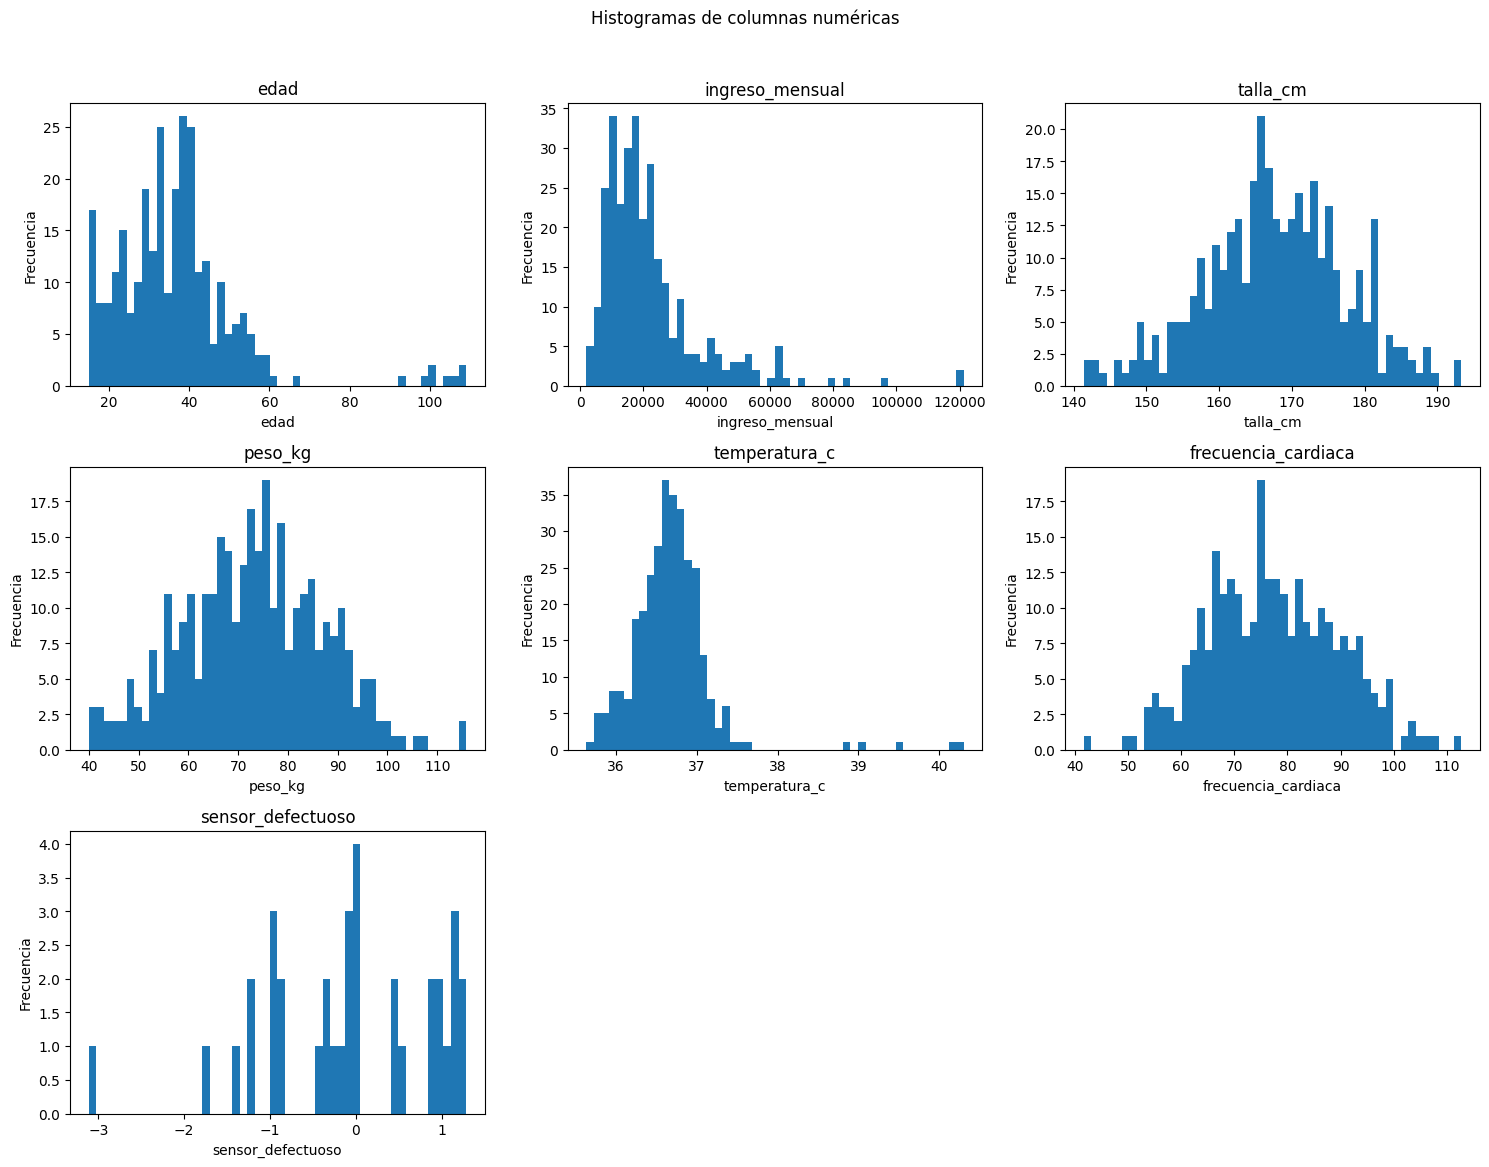

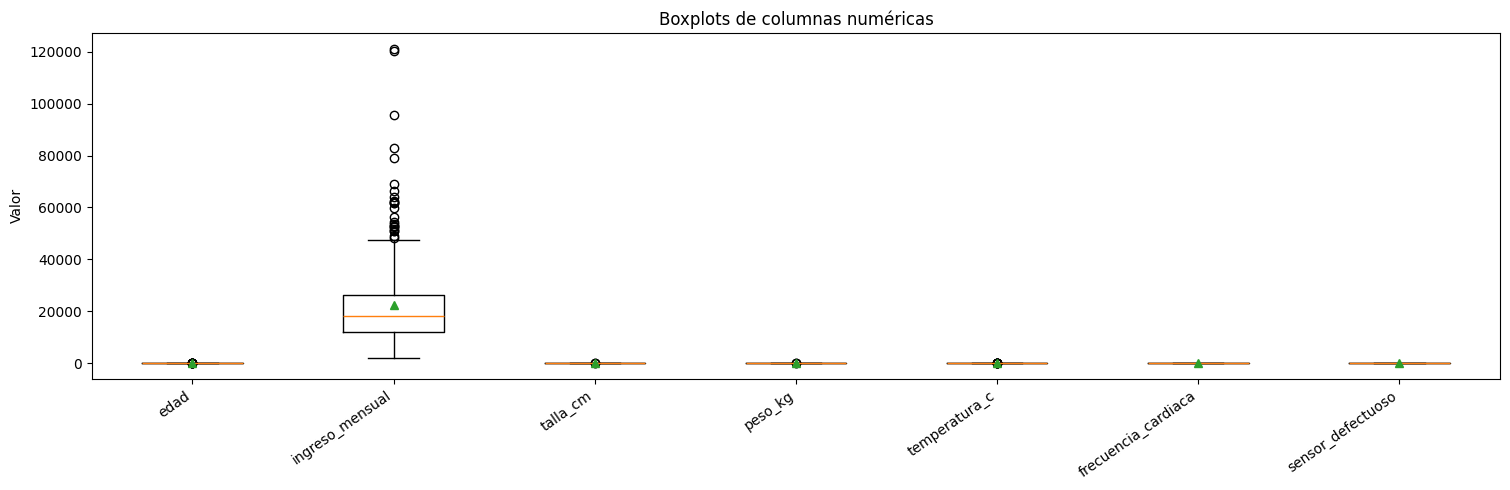

In [12]:
def bounded_guess(s: pd.Series):
        #convertimos la serie a una serie numerica y eliminamos los vacios
    s = pd.to_numeric(s, errors='coerce').dropna()
    if s.empty:
        return None

    min_val, max_val = float(s.min()), float(s.max())

#checar si entre el rango de 0,1 o 0,1==
    if min_val<= 0.0 and max_val<= 1.0:
        return "[0,1]"
    if min_val<= 0.0 and max_val<= 1.0:
        return "[0,100]"
    return None

if len(num_cols) == 0:
    print("No hay columnas numericas en X_train")
else:
# --------- Figura 1: HISTOGRAMAS (todos en subplots) ----------
    n = len(num_cols)
    ncols = min(3, n)
    nrows = math.ceil(n / ncols)

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 3.8*nrows))
    axes = np.atleast_1d(axes).ravel()
    #Aplico Histograma y Box Plot a la parte de Entrenamiento
    for i, col in enumerate(num_cols):
        s = pd.to_numeric(X_train[col], errors="coerce").dropna()
        ax = axes[i]
        if s.empty:
            ax.text(0.5, 0.5, "Sin datos", ha="center", va="center")
            ax.set_title(col); ax.set_xlabel(col); ax.set_ylabel("Frecuencia")
            ax.set_xticks([]); ax.set_yticks([])
        else:
            ax.hist(s, bins=50)
            ax.set_title(col)
            ax.set_xlabel(col)
            ax.set_ylabel("Frecuencia")

    # Oculta subplots sobrantes
    for j in range(len(num_cols), len(axes)):
        axes[j].axis("off")
    # Guarda Histograma
    fig.suptitle("Histogramas de columnas numéricas", y=1.02, fontsize=12)
    fig.tight_layout()
    fig.savefig("histogramas_numericas.png", dpi=150, bbox_inches="tight")
    plt.show()
    plt.close(fig)

    # --------- Figura 2: BOXPLOTS (todas en un eje) ----------
    series_pairs = []
    for c in num_cols:
        v = pd.to_numeric(X_train[c], errors="coerce").dropna().values
        if v.size > 0:
            series_pairs.append((c, v))

    if len(series_pairs) == 0:
        print("No hay datos numéricos válidos para boxplots. No se genera boxplot.")
        box_path = None
    else:
        labels = [c for c, _ in series_pairs]
        values = [v for _, v in series_pairs]

        fig2 = plt.figure(figsize=(1.6*len(labels)+4, 5))
        plt.boxplot(values, vert=True, showmeans=True)
        plt.xticks(ticks=range(1, len(labels)+1), labels=labels, rotation=35, ha="right")
        plt.ylabel("Valor")
        plt.title("Boxplots de columnas numéricas")
        plt.tight_layout()
        fig2.savefig("boxplots_numericas.png", dpi=150, bbox_inches="tight")
        plt.show()
        plt.close(fig2)



# Pipeline de Procesamiento de Datos

In [13]:
# Separar columnas numéricas y categóricas
num_cols = X_train.select_dtypes(include=['number']).columns.tolist()
cat_cols = X_train.select_dtypes(include=['object']).columns.tolist()

print(f"Columnas numéricas: {num_cols}")
print(f"Columnas categóricas: {cat_cols}")

# Verificar la cardinalidad de las variables categóricas
for col in cat_cols:
    unique_count = X_train[col].nunique()
    print(f"{col}: {unique_count} valores únicos")

# Excluir 'referencia' y 'codigo_serie' del procesamiento por alta cardinalidad
cat_cols_processed = [col for col in cat_cols if col not in ['referencia', 'codigo_serie']]
print(f"\nColumnas categóricas a procesar: {cat_cols_processed}")

# Crear pipeline de procesamiento
# Para columnas numéricas: imputación con mediana y escalado robusto
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

# Para columnas categóricas: imputación con valor más frecuente y OneHotEncoder
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

# Combinar ambos pipelines
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols_processed)
])

# Ajustar el preprocessor con los datos de entrenamiento
preprocessor.fit(X_train)

# Transformar los datos de entrenamiento y prueba
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print(f"Forma de X_train_processed: {X_train_processed.shape}")
print(f"Forma de X_test_processed: {X_test_processed.shape}")

Columnas numéricas: ['edad', 'ingreso_mensual', 'talla_cm', 'peso_kg', 'temperatura_c', 'frecuencia_cardiaca', 'sensor_defectuoso']
Columnas categóricas: ['ciudad', 'tipo_servicio', 'nivel', 'codigo_serie', 'referencia']
ciudad: 5 valores únicos
tipo_servicio: 3 valores únicos
nivel: 3 valores únicos
codigo_serie: 3 valores únicos
referencia: 364 valores únicos

Columnas categóricas a procesar: ['ciudad', 'tipo_servicio', 'nivel']
Forma de X_train_processed: (375, 15)
Forma de X_test_processed: (125, 15)


In [14]:
# Obtener los nombres de las columnas transformadas
feature_names = (num_cols + 
                list(preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(cat_cols_processed)))

print(f"Nombres de características transformadas: {feature_names}")

# Crear DataFrames con los datos procesados
X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names, index=X_train.index)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names, index=X_test.index)

# Guardar como datos_processing_integration_training.csv (solo entrenamiento)
X_train_processed_df.to_csv("data/datos_processing_integration_training.csv", index=False)
print("Archivo 'datos_processing_integration_training.csv' guardado exitosamente")

# Crear archivos finales procesados incluyendo columnas originales importantes
# Entrenamiento_Procesado.csv - datos de entrenamiento con todas las transformaciones
entrenamiento_procesado = X_train_processed_df.copy()
entrenamiento_procesado.to_csv("data/Entrenamiento_Procesado.csv", index=False)
print("Archivo 'Entrenamiento_Procesado.csv' guardado exitosamente")

# Prueba_Procesado.csv - datos de prueba con todas las transformaciones  
prueba_procesado = X_test_processed_df.copy()
prueba_procesado.to_csv("data/Prueba_Procesado.csv", index=False)
print("Archivo 'Prueba_Procesado.csv' guardado exitosamente")

Nombres de características transformadas: ['edad', 'ingreso_mensual', 'talla_cm', 'peso_kg', 'temperatura_c', 'frecuencia_cardiaca', 'sensor_defectuoso', 'ciudad_Guadalajara', 'ciudad_Monterrey', 'ciudad_Puebla', 'ciudad_Toluca', 'tipo_servicio_estandar', 'tipo_servicio_premium', 'nivel_bajo', 'nivel_medio']
Archivo 'datos_processing_integration_training.csv' guardado exitosamente
Archivo 'Entrenamiento_Procesado.csv' guardado exitosamente
Archivo 'Prueba_Procesado.csv' guardado exitosamente


# Visualizaciones de Datos Escalados

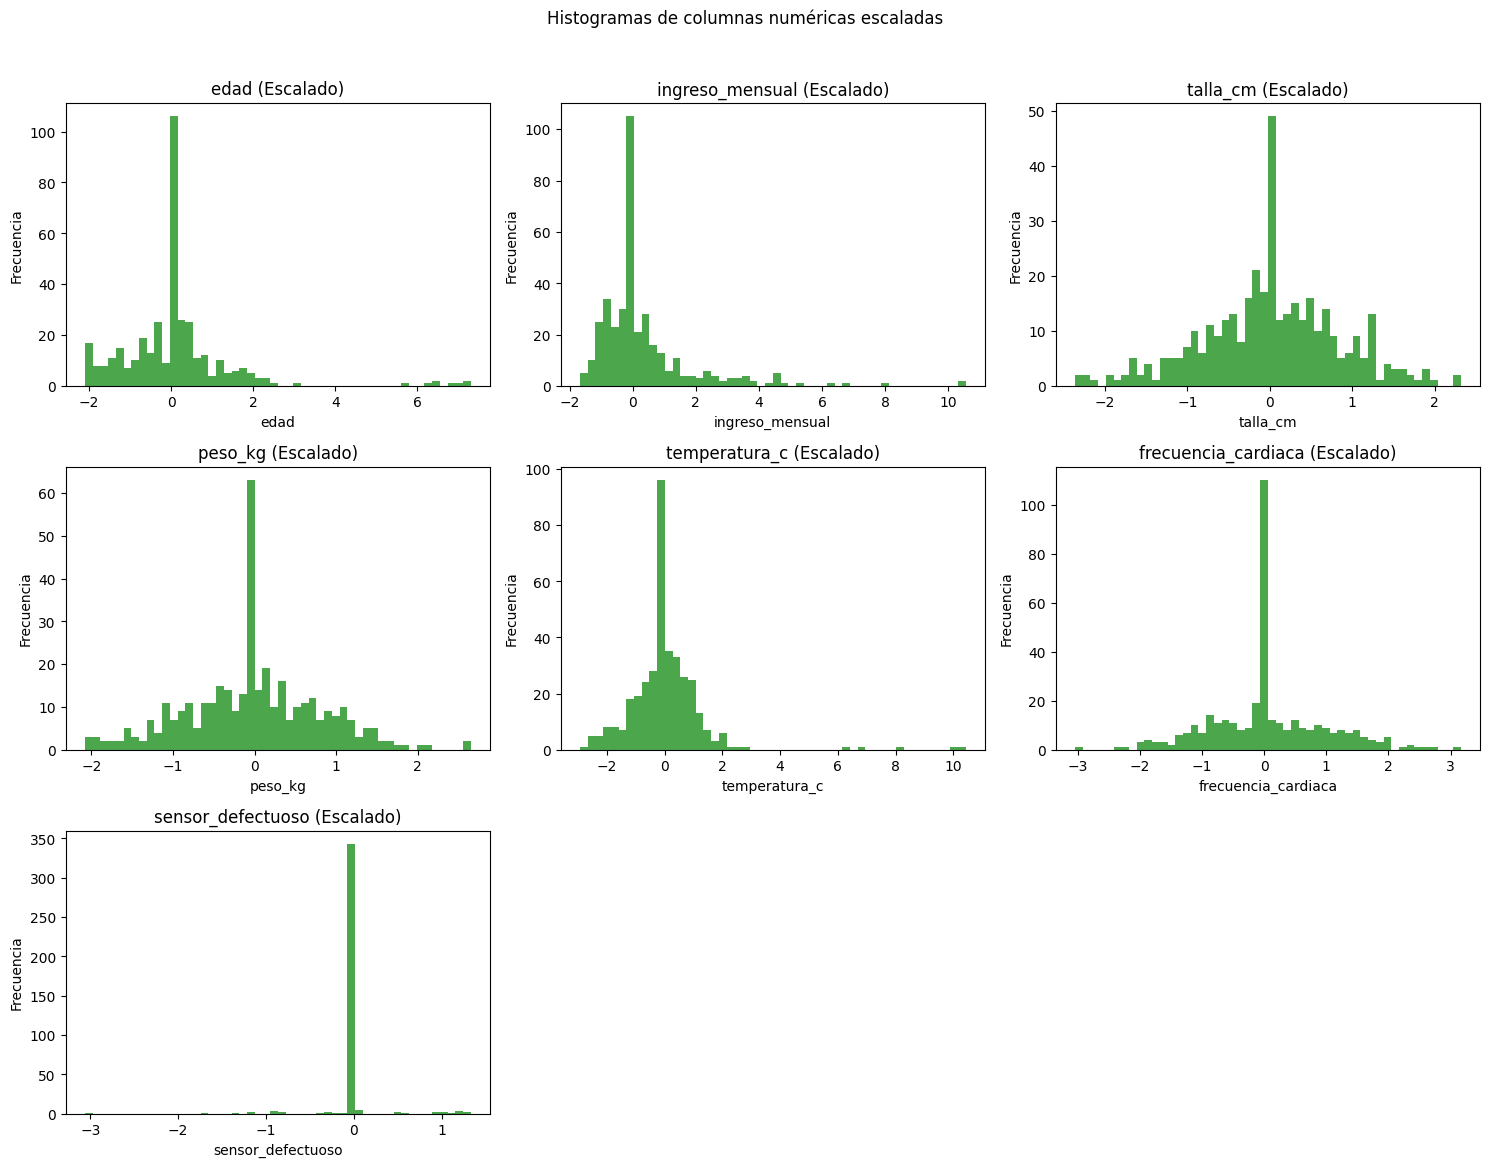

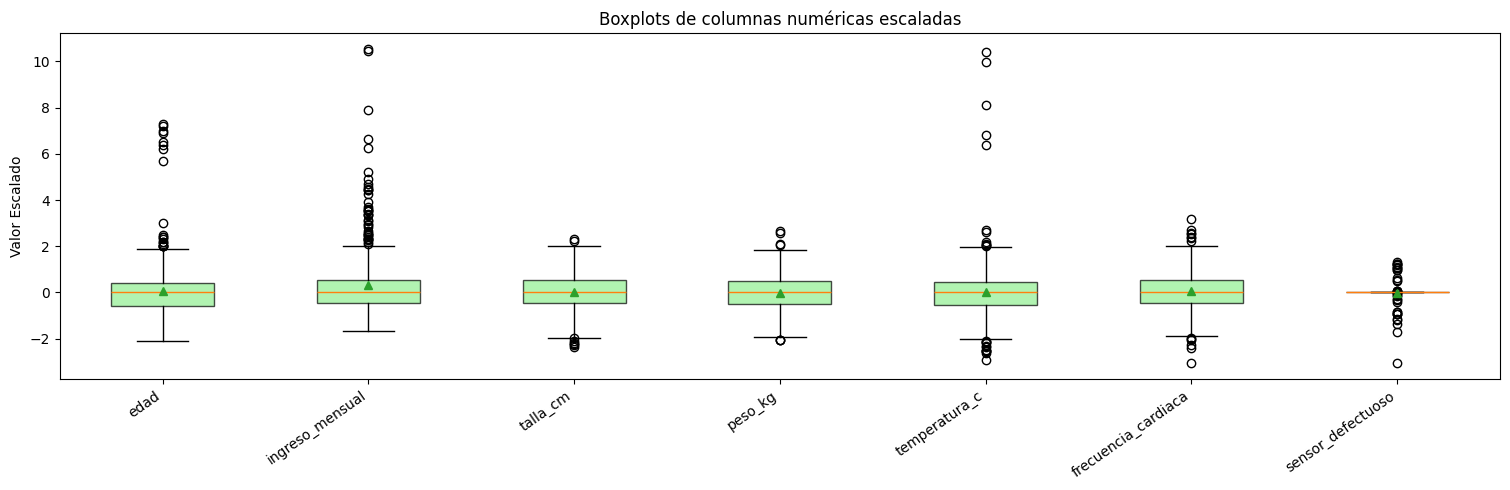

Visualizaciones escaladas creadas exitosamente:


In [15]:
# Crear visualizaciones de los datos escalados (solo columnas numéricas originales)
scaled_num_cols = num_cols  # Las primeras 7 columnas son las numéricas originales
scaled_data = X_train_processed_df[scaled_num_cols]

# --------- Figura 1: HISTOGRAMAS ESCALADOS ----------
n = len(scaled_num_cols)
ncols = min(3, n)
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(5*ncols, 3.8*nrows))
axes = np.atleast_1d(axes).ravel()

for i, col in enumerate(scaled_num_cols):
    s = scaled_data[col].dropna()
    ax = axes[i]
    if s.empty:
        ax.text(0.5, 0.5, "Sin datos", ha="center", va="center")
        ax.set_title(f"{col} (Escalado)")
        ax.set_xlabel(col)
        ax.set_ylabel("Frecuencia")
        ax.set_xticks([])
        ax.set_yticks([])
    else:
        ax.hist(s, bins=50, alpha=0.7, color='green')
        ax.set_title(f"{col} (Escalado)")
        ax.set_xlabel(col)
        ax.set_ylabel("Frecuencia")

# Ocultar subplots sobrantes
for j in range(len(scaled_num_cols), len(axes)):
    axes[j].axis("off")

fig.suptitle("Histogramas de columnas numéricas escaladas", y=1.02, fontsize=12)
fig.tight_layout()
fig.savefig("Scaled_Histogramas.png", dpi=150, bbox_inches="tight")
plt.show()
plt.close(fig)

# --------- Figura 2: BOXPLOTS ESCALADOS ----------
series_pairs = []
for c in scaled_num_cols:
    v = scaled_data[c].dropna().values
    if v.size > 0:
        series_pairs.append((c, v))

if len(series_pairs) == 0:
    print("No hay datos numéricos válidos para boxplots escalados.")
else:
    labels = [c for c, _ in series_pairs]
    values = [v for _, v in series_pairs]
    
    fig2 = plt.figure(figsize=(1.6*len(labels)+4, 5))
    bp = plt.boxplot(values, vert=True, showmeans=True, patch_artist=True)
    
    # Colorear los boxplots
    for patch in bp['boxes']:
        patch.set_facecolor('lightgreen')
        patch.set_alpha(0.7)
    
    plt.xticks(ticks=range(1, len(labels)+1), labels=labels, rotation=35, ha="right")
    plt.ylabel("Valor Escalado")
    plt.title("Boxplots de columnas numéricas escaladas")
    plt.tight_layout()
    fig2.savefig("Scaled_BoxPlots.png", dpi=150, bbox_inches="tight")
    plt.show()
    plt.close(fig2)

print("Visualizaciones escaladas creadas exitosamente:")

# Resumen de Archivos Generados

In [16]:
# Verificar que todos los archivos solicitados se han creado
import os

archivos_solicitados = [
    "data/datos_processing_integration_training.csv",
    "histogramas_numericas.png", 
    "boxplots_numericas.png",
    "Scaled_Histogramas.png",
    "Scaled_BoxPlots.png",
    "data/Entrenamiento_Procesado.csv",
    "data/Prueba_Procesado.csv"
]

print("=== RESUMEN DE ARCHIVOS GENERADOS ===\n")

for i, archivo in enumerate(archivos_solicitados, 1):
    if os.path.exists(archivo):
        size = os.path.getsize(archivo)
        print(f" {i}. {archivo} - {size:,} bytes")
    else:
        print(f" {i}. {archivo} - ¡ERROR! - ARCHIVO NO ENCONTRADO")

print(f"\n=== PROCESAMIENTO COMPLETADO ===")
print(f"• Datos originales: {df.shape[0]} filas, {df.shape[1]} columnas")
print(f"• Datos de entrenamiento: {X_train.shape[0]} filas")
print(f"• Datos de prueba: {X_test.shape[0]} filas")
print(f"• Características procesadas: {X_train_processed.shape[1]} columnas")
print(f"• Columnas numéricas escaladas: {len(num_cols)}")
print(f"• Columnas categóricas codificadas: {len(cat_cols_processed)}")
print("\n¡Todos los archivos han sido generados exitosamente!")

=== RESUMEN DE ARCHIVOS GENERADOS ===

 1. data/datos_processing_integration_training.csv - 47,981 bytes
 2. histogramas_numericas.png - 119,691 bytes
 3. boxplots_numericas.png - 68,322 bytes
 4. Scaled_Histogramas.png - 124,430 bytes
 5. Scaled_BoxPlots.png - 80,868 bytes
 6. data/Entrenamiento_Procesado.csv - 47,981 bytes
 7. data/Prueba_Procesado.csv - 16,110 bytes

=== PROCESAMIENTO COMPLETADO ===
• Datos originales: 500 filas, 12 columnas
• Datos de entrenamiento: 375 filas
• Datos de prueba: 125 filas
• Características procesadas: 15 columnas
• Columnas numéricas escaladas: 7
• Columnas categóricas codificadas: 3

¡Todos los archivos han sido generados exitosamente!
